In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor

In [8]:
import os
print(os.getcwd())  # Show current directory


C:\Users\Zahirul\Documents\My_Git_Repository\King County - House Prediction Linear Regression


In [9]:
df = pd.read_csv(r'C:\Users\Zahirul\Documents\My_Git_Repository\King County - House Prediction Linear Regression\kc_house_data.csv\kc_house_data.csv')


In [10]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
X_unf=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y_unf=df['price']

X_unscl = X_unf[(np.abs(zscore(X_unf)) < 3).all(axis=1)]
y= y_unf[(np.abs(zscore(X_unf)) < 3).all(axis=1)]

In [13]:
scaler = StandardScaler()
X_unsel = scaler.fit_transform(X_unscl)
# for select or scale features

In [14]:
selector = SelectKBest(score_func=f_regression, k=18)  
X = selector.fit_transform(X_unsel, y)
# for feature selection

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=500)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
model_score=model.score(X_test,y_test)
y_predict=model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print('R2:', model_score)
print('MSE:', mse)


R2: 0.8744942612475549
MSE: 7789980959.066174


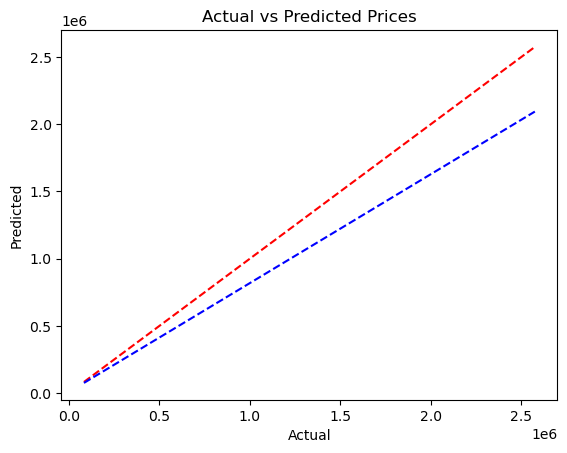

In [19]:
# Assuming predictions is the model output and y_test are the true values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_predict), max(y_predict)], color='blue', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
### 1. Descriptive Statistics ###
summary_stats = df.describe()
print("Descriptive Statistics:\n", summary_stats)

In [ ]:
### 2. Correlation Heatmap ###
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

### 3. Visual Analysis ###
# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=50, kde=True, color="blue")
plt.title("Distribution of House Prices in King County")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Square footage vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["sqft_living"], y=df["price"], alpha=0.5, color="red")
plt.title("Living Space (sqft) vs. Price")
plt.xlabel("Square Footage of Living Space")
plt.ylabel("Price ($)")
plt.show()

In [ ]:
# Boxplot for house prices
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price"], color="skyblue")
plt.title("Box Plot of House Prices in King County")
plt.xlabel("Price ($)")
plt.show()

# Outlier calculation using the IQR method
Q1 = df["price"].quantile(0.25)  # First quartile (25%)
Q3 = df["price"].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile Range

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR  # Lower threshold
upper_bound = Q3 + 1.5 * IQR  # Upper threshold

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")